In [1]:
API_SECRET_KEY = "######################################"

## **MY GRAPHS**


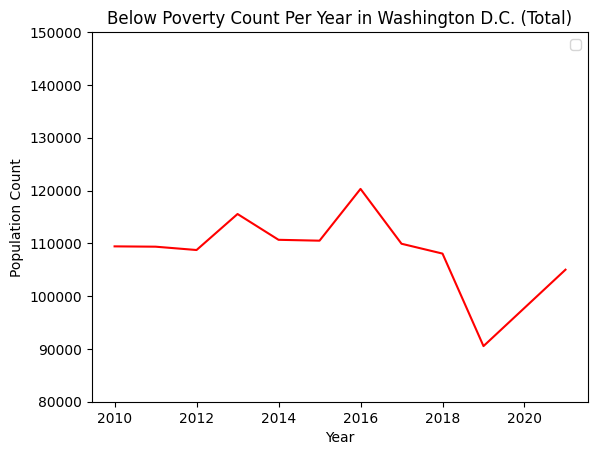

In [2]:
import requests
import pandas as pd

below_poverty_frame = [['year', 'below_poverty_total']]

for year in range(2010,2022):
    url = 'https://api.census.gov/data/' + str(year) + '/acs/acs1/subject'
    params = {
    'get': 'S1701_C02_001E', 
    'for': 'state:11',
    'key': API_SECRET_KEY
    }
    
    response = requests.get(url, params=params)
    if response.status_code == 200:
    # Extract the JSON data from the response
        new_data = response.json()
        below_poverty_frame.append([year, new_data[1][0]])
        # new_data += [year, new_data[1][0]] 

df = pd.DataFrame(below_poverty_frame)
df
# Set the first row as the column names
df.columns = df.iloc[0]
# Remove the first row
df = df[1:]

# Set the index to 'NAME' column
# df.set_index('x', inplace=True)

# Convert numerical columns to numeric type
df = df.apply(pd.to_numeric, errors='ignore')

# Display the cleaned dataframe
df.reset_index(drop=True, inplace=True)

# scatter plot
import matplotlib.pyplot as plt

df.plot(kind = 'line',
        x = 'year',
        y = 'below_poverty_total',
        color = 'r',
        ylim=(80000, 150000),
        xlabel="Year",
        ylabel="Population Count")
  
# set the title
plt.legend('')
plt.title('Below Poverty Count Per Year in Washington D.C. (Total)')
  
# show the plot
plt.show()

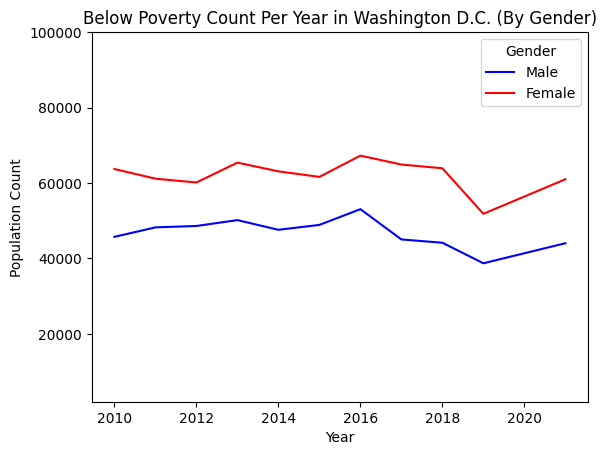

In [40]:
import requests
import pandas as pd

gender_poverty_frame = [['year', 'Male', 'Female']]
url = None
params = None

for year in range(2010, 2022):
    if year <= 2014:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs1/subject'
        params = {
        'get': 'S1701_C02_006E,S1701_C02_007E', 
        'for': 'state:11', # State 11 is District of Columbia
        'key': API_SECRET_KEY
        }
    else:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs1/subject'
        params = {
        'get': 'S1701_C02_011E,S1701_C02_012E', 
        'for': 'state:11', # State 11 is District of Columbia
        'key': API_SECRET_KEY
        }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
    # Extract the JSON data from the response
        new_data = response.json()
        gender_poverty_frame.append([year, new_data[1][0], new_data[1][1]])

df = pd.DataFrame(gender_poverty_frame)
df
# Set the first row as the column names
df.columns = df.iloc[0]
# Remove the first row
df = df[1:]

# Convert numerical columns to numeric type
df = df.apply(pd.to_numeric, errors='ignore')

# Display the cleaned dataframe
df.reset_index(drop=True, inplace=True)

# scatter plot
import matplotlib.pyplot as plt

ax = df.plot.line(color=["b","r"], x="year", rot=0, ylim=(2000, 100000),title='Below Poverty Count Per Year in Washington D.C. (By Gender)')
ax.set_xlabel("Year")
ax.set_ylabel("Population Count")

plt.legend(title="Gender")


plt.show()

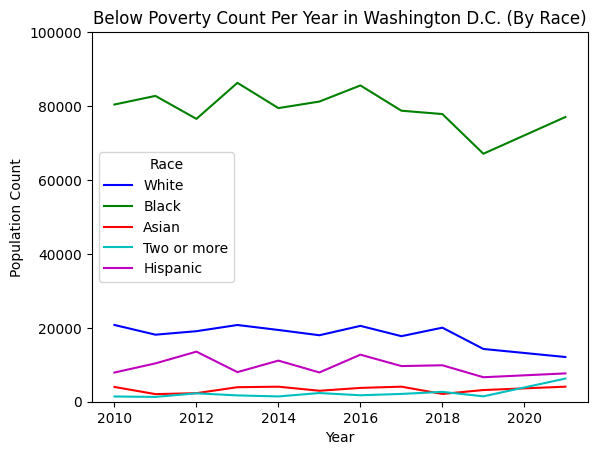

In [3]:
import requests
import pandas as pd

race_poverty_frame = [['year', 'White', 'Black', 'Asian', 'Two or more', 'Hispanic']]
url = None
params = None

for year in range(2010, 2022):
    if year <= 2014:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs1/subject'
        params = {
        'get': 'S1701_C02_009E,S1701_C02_010E,S1701_C02_012E,S1701_C02_015E,S1701_C02_016E', 
        'for': 'state:11', # State 11 is District of Columbia
        'key': API_SECRET_KEY
        }
    else:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs1/subject'
        params = {
        'get': 'S1701_C02_013E,S1701_C02_014E,S1701_C02_016E,S1701_C02_019E,S1701_C02_020E', 
        'for': 'state:11', # State 11 is District of Columbia
        'key': API_SECRET_KEY
        }
   
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
    # Extract the JSON data from the response
        new_data = response.json()
        race_poverty_frame.append([year, new_data[1][0], new_data[1][1],new_data[1][2],new_data[1][3],new_data[1][4]])
        # print([year, new_data[1][0]])
        # race_poverty_frame.append([year, new_data[1][0]])

df = pd.DataFrame(race_poverty_frame)
# df
# Set the first row as the column names
df.columns = df.iloc[0]
# Remove the first row
df = df[1:]

# Set the index to 'NAME' column
# df.set_index('x', inplace=True)

# Convert numerical columns to numeric type
df = df.apply(pd.to_numeric, errors='ignore')

# Display the cleaned dataframe
df.reset_index(drop=True, inplace=True)

# scatter plot
import matplotlib.pyplot as plt

ax = df.plot.line(color=["b", "g", "r", "c", "m"], x="year", rot=0, ylim=(0, 100000),title='Below Poverty Count Per Year in Washington D.C. (By Race)')
# ax = df.plot.bar(color=["b"], x="year", rot=0, ylim=(0, 100),title='% Poverty Status Per Year in Washington D.C. (By Race)')

ax.set_xlabel("Year")
ax.set_ylabel("Population Count")

plt.legend(title="Race")

plt.show()

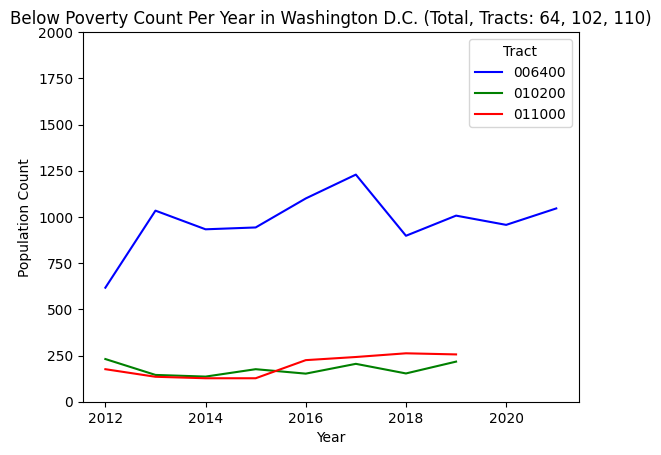

In [20]:
import requests
import pandas as pd

# below_poverty_tract = [['year', 'below_poverty_tract_64', 'below_poverty_tract_10201', 'below_poverty_tract_10202', 'below_poverty_tract_105', 'below_poverty_tract_110', 'below_poverty_tract_11001', 'below_poverty_tract_11002']]
# below_poverty_tract = [['year', 'population', 'tract']]

def place_info (new_data, year):
    
    new_row = [year, None,  None, None ]
            #  year  006400 010200 011000
            
    for row in new_data[1:]:
        tract = row[-1]
        val = row[0]

        if tract == '006400':
            new_row[1] = val
        
        if tract == '010200':
            new_row[2] = val
            
        if tract == '011000':
            new_row[3] = val
        
    return new_row

df = [['year', '006400', '010200', '011000',]]

for year in range(2010,2022):
    url = 'https://api.census.gov/data/' + str(year) + '/acs/acs5/subject'
    params = {
    'get': 'S1701_C02_001E', 
    'for': 'tract: 006400, 010200, 011000',
     # 'for': 'tract:006400',
    'in': 'state:11, county:001',
    'key': API_SECRET_KEY
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
    # Extract the JSON data from the response
        new_data = response.json()
        new_row = place_info(new_data, year)            
        df.append(new_row)
            
df = pd.DataFrame(df)
df.columns = df.iloc[0]
df = df[1:]
df = df.apply(pd.to_numeric, errors='ignore')

# Display the cleaned dataframe
df.reset_index(drop=True, inplace=True)

# scatter plot
import matplotlib.pyplot as plt

ax = df.plot.line(color=["b", "g", "r",], x="year", rot=0, ylim=(0, 2000),title='Below Poverty Count Per Year in Washington D.C. (Total, Tracts: 64, 102, 110)')
# ax = df.plot.bar(color=["b"], x="year", rot=0, ylim=(0, 100),title='% Poverty Status Per Year in Washington D.C. (By Race)')

ax.set_xlabel("Year")
ax.set_ylabel("Population Count")

plt.legend(title="Tract")

plt.show()

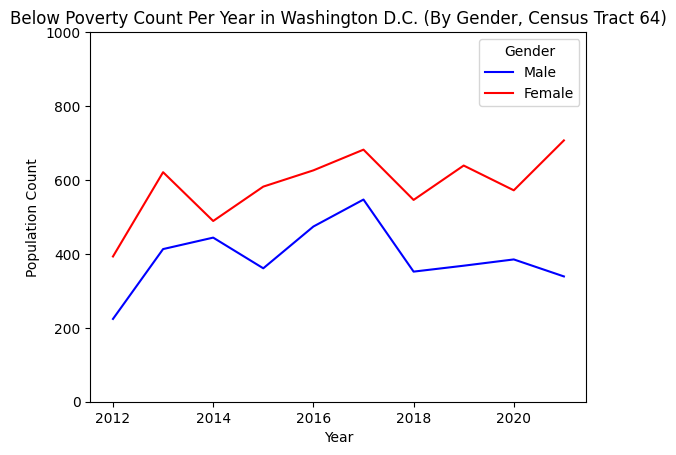

In [37]:
import requests
import pandas as pd

gender_poverty_tract = [['year', 'Male', 'Female']]
url = None
params = None

for year in range(2010, 2022):
    if year <= 2014:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs5/subject'
        params = {
            'get': 'S1701_C02_006E,S1701_C02_007E', 
            'for': 'tract:006400',
            # 'for': 'tract: 006400, 010200, 011000',
            'in': 'state:11, county:001',
            'key': API_SECRET_KEY
        }
    else:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs5/subject'
        params = {
            'get': 'S1701_C02_011E,S1701_C02_012E', 
            'for': 'tract:006400',
            # 'for': 'tract: 006400, 010200, 011000',
            'in': 'state:11, county:001',
            'key': API_SECRET_KEY
        }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
    # Extract the JSON data from the response
        new_data = response.json()
        gender_poverty_tract.append([year, new_data[1][0], new_data[1][1]])

df = pd.DataFrame(gender_poverty_tract)
df

# # Set the first row as the column names
df.columns = df.iloc[0]
df
# # Remove the first row
df = df[1:]
df

# # Convert numerical columns to numeric type
df = df.apply(pd.to_numeric, errors='ignore')

# # Display the cleaned dataframe
df.reset_index(drop=True, inplace=True)
df
# # scatter plot
import matplotlib.pyplot as plt

ax = df.plot.line(color=["b","r"], x="year", rot=0, ylim=(0, 1000),title='Below Poverty Count Per Year in Washington D.C. (By Gender, Census Tract 64)')
ax.set_xlabel("Year")
ax.set_ylabel("Population Count")

plt.legend(title="Metric")

plt.legend(title="Gender")
plt.show()

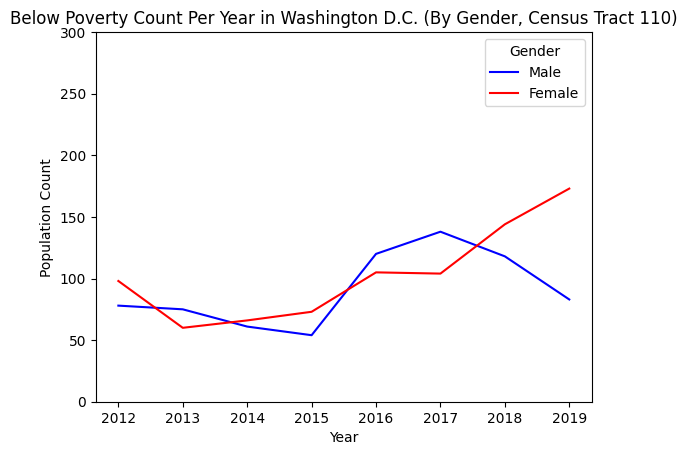

In [36]:
import requests
import pandas as pd

gender_poverty_tract = [['year', 'Male', 'Female']]
url = None
params = None

for year in range(2010, 2022):
    if year <= 2014:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs5/subject'
        params = {
            'get': 'S1701_C02_006E,S1701_C02_007E', 
            'for': 'tract:011000',
            # 'for': 'tract: 006400, 010200, 011000',
            'in': 'state:11, county:001',
            'key': API_SECRET_KEY
        }
    else:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs5/subject'
        params = {
            'get': 'S1701_C02_011E,S1701_C02_012E', 
            'for': 'tract:011000',
            # 'for': 'tract: 006400, 010200, 011000',
            'in': 'state:11, county:001',
            'key': API_SECRET_KEY
        }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
    # Extract the JSON data from the response
        new_data = response.json()
        gender_poverty_tract.append([year, new_data[1][0], new_data[1][1]])

df = pd.DataFrame(gender_poverty_tract)
df

# # Set the first row as the column names
df.columns = df.iloc[0]
df
# # Remove the first row
df = df[1:]
df

# # Convert numerical columns to numeric type
df = df.apply(pd.to_numeric, errors='ignore')

# # Display the cleaned dataframe
df.reset_index(drop=True, inplace=True)
df
# # scatter plot
import matplotlib.pyplot as plt

ax = df.plot.line(color=["b","r"], x="year", rot=0, ylim=(0, 300),title='Below Poverty Count Per Year in Washington D.C. (By Gender, Census Tract 110)')
ax.set_xlabel("Year")
ax.set_ylabel("Population Count")

plt.legend(title="Metric")

plt.legend(title="Gender")
plt.show()

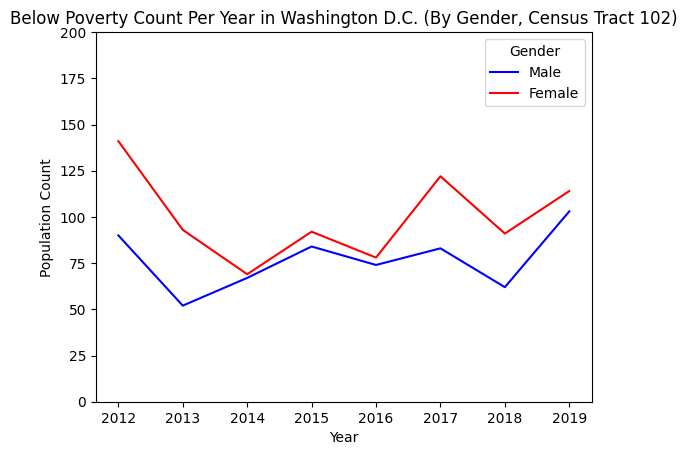

In [35]:
import requests
import pandas as pd

gender_poverty_tract = [['year', 'Male', 'Female']]
url = None
params = None

for year in range(2010, 2022):
    if year <= 2014:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs5/subject'
        params = {
            'get': 'S1701_C02_006E,S1701_C02_007E', 
            'for': 'tract:010200',
            # 'for': 'tract: 006400, 010200, 011000',
            'in': 'state:11, county:001',
            'key': API_SECRET_KEY
        }
    else:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs5/subject'
        params = {
            'get': 'S1701_C02_011E,S1701_C02_012E', 
            'for': 'tract:010200',
            # 'for': 'tract: 006400, 010200, 011000',
            'in': 'state:11, county:001',
            'key': API_SECRET_KEY
        }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
    # Extract the JSON data from the response
        new_data = response.json()
        gender_poverty_tract.append([year, new_data[1][0], new_data[1][1]])

df = pd.DataFrame(gender_poverty_tract)
df

# # Set the first row as the column names
df.columns = df.iloc[0]
df
# # Remove the first row
df = df[1:]
df

# # Convert numerical columns to numeric type
df = df.apply(pd.to_numeric, errors='ignore')

# # Display the cleaned dataframe
df.reset_index(drop=True, inplace=True)
df
# # scatter plot
import matplotlib.pyplot as plt

ax = df.plot.line(color=["b","r"], x="year", rot=0, ylim=(0, 200),title='Below Poverty Count Per Year in Washington D.C. (By Gender, Census Tract 102)')
ax.set_xlabel("Year")
ax.set_ylabel("Population Count")

plt.legend(title="Metric")

plt.legend(title="Gender")
plt.show()

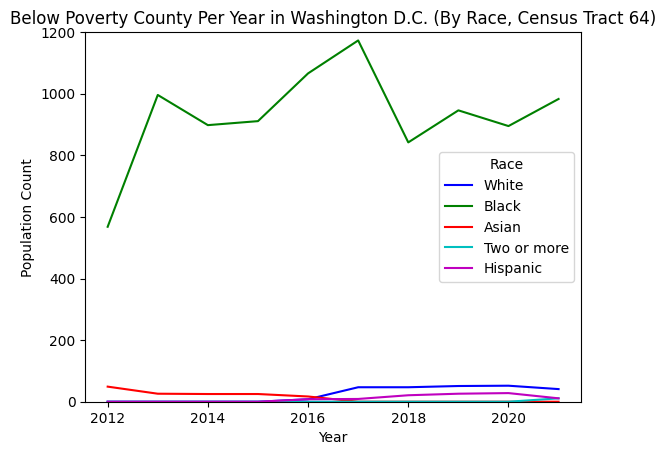

In [34]:
import requests
import pandas as pd

race_poverty_tract = [['year', 'White', 'Black', 'Asian', 'Two or more', 'Hispanic']]
url = None
params = None

for year in range(2010, 2022):
    if year <= 2014:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs5/subject'
        params = {
        'get': 'S1701_C02_009E,S1701_C02_010E,S1701_C02_012E,S1701_C02_015E,S1701_C02_016E', 
        'for': 'tract:006400',
        'in': 'state:11, county:001',
        'key': API_SECRET_KEY
        }
    else:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs5/subject'
        params = {
        'get': 'S1701_C02_013E,S1701_C02_014E,S1701_C02_016E,S1701_C02_019E,S1701_C02_020E', 
        'for': 'tract:006400',
        'in': 'state:11, county:001',
        'key': API_SECRET_KEY
        }
   
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
    # Extract the JSON data from the response
        new_data = response.json()
        race_poverty_tract.append([year, new_data[1][0], new_data[1][1],new_data[1][2],new_data[1][3],new_data[1][4]])

df = pd.DataFrame(race_poverty_tract)
# df
# Set the first row as the column names
df.columns = df.iloc[0]
# Remove the first row
df = df[1:]

# Convert numerical columns to numeric type
df = df.apply(pd.to_numeric, errors='ignore')

# Display the cleaned dataframe
df.reset_index(drop=True, inplace=True)

# scatter plot
import matplotlib.pyplot as plt

ax = df.plot.line(color=["b", "g", "r", "c", "m"], x="year", rot=0, ylim=(0, 1200),title='Below Poverty County Per Year in Washington D.C. (By Race, Census Tract 64)')
# ax = df.plot.bar(color=["b"], x="year", rot=0, ylim=(0, 100),title='% Poverty Status Per Year in Washington D.C. (By Race)')

ax.set_xlabel("Year")
ax.set_ylabel("Population Count")

plt.legend(loc='center right', title="Race")

plt.show()

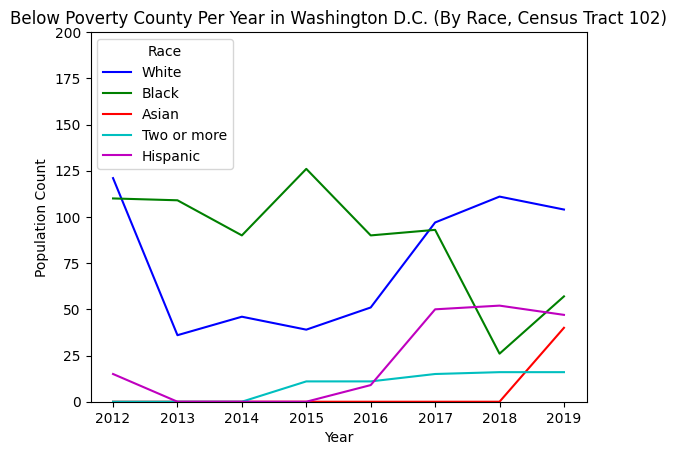

In [33]:
import requests
import pandas as pd

race_poverty_tract = [['year', 'White', 'Black', 'Asian', 'Two or more', 'Hispanic']]
url = None
params = None

for year in range(2010, 2022):
    if year <= 2014:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs5/subject'
        params = {
        'get': 'S1701_C02_009E,S1701_C02_010E,S1701_C02_012E,S1701_C02_015E,S1701_C02_016E', 
        'for': 'tract:010200',
        'in': 'state:11, county:001',
        'key': API_SECRET_KEY
        }
    else:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs5/subject'
        params = {
        'get': 'S1701_C02_013E,S1701_C02_014E,S1701_C02_016E,S1701_C02_019E,S1701_C02_020E', 
        'for': 'tract:010200',
        'in': 'state:11, county:001',
        'key': API_SECRET_KEY
        }
   
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
    # Extract the JSON data from the response
        new_data = response.json()
        race_poverty_tract.append([year, new_data[1][0], new_data[1][1],new_data[1][2],new_data[1][3],new_data[1][4]])

df = pd.DataFrame(race_poverty_tract)
# df
# Set the first row as the column names
df.columns = df.iloc[0]
# Remove the first row
df = df[1:]

# Convert numerical columns to numeric type
df = df.apply(pd.to_numeric, errors='ignore')

# Display the cleaned dataframe
df.reset_index(drop=True, inplace=True)

# scatter plot
import matplotlib.pyplot as plt

ax = df.plot.line(color=["b", "g", "r", "c", "m"], x="year", rot=0, ylim=(0, 200),title='Below Poverty County Per Year in Washington D.C. (By Race, Census Tract 102)')
# ax = df.plot.bar(color=["b"], x="year", rot=0, ylim=(0, 100),title='% Poverty Status Per Year in Washington D.C. (By Race)')

ax.set_xlabel("Year")
ax.set_ylabel("Population Count")

plt.legend(loc='upper left', title="Race")

plt.show()


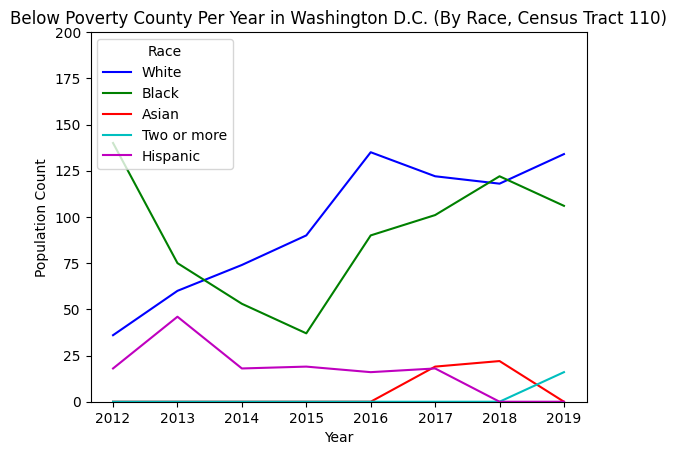

In [31]:
import requests
import pandas as pd

race_poverty_tract = [['year', 'White', 'Black', 'Asian', 'Two or more', 'Hispanic']]
url = None
params = None

for year in range(2010, 2022):
    if year <= 2014:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs5/subject'
        params = {
        'get': 'S1701_C02_009E,S1701_C02_010E,S1701_C02_012E,S1701_C02_015E,S1701_C02_016E', 
        'for': 'tract:011000',
        'in': 'state:11, county:001',
        'key': API_SECRET_KEY
        }
    else:
        url = 'https://api.census.gov/data/' + str(year) + '/acs/acs5/subject'
        params = {
        'get': 'S1701_C02_013E,S1701_C02_014E,S1701_C02_016E,S1701_C02_019E,S1701_C02_020E', 
        'for': 'tract:011000',
        'in': 'state:11, county:001',
        'key': API_SECRET_KEY
        }
   
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
    # Extract the JSON data from the response
        new_data = response.json()
        race_poverty_tract.append([year, new_data[1][0], new_data[1][1],new_data[1][2],new_data[1][3],new_data[1][4]])

df = pd.DataFrame(race_poverty_tract)
# df
# Set the first row as the column names
df.columns = df.iloc[0]
# Remove the first row
df = df[1:]

# Convert numerical columns to numeric type
df = df.apply(pd.to_numeric, errors='ignore')

# Display the cleaned dataframe
df.reset_index(drop=True, inplace=True)

# scatter plot
import matplotlib.pyplot as plt

ax = df.plot.line(color=["b", "g", "r", "c", "m"], x="year", rot=0, ylim=(0, 200),title='Below Poverty County Per Year in Washington D.C. (By Race, Census Tract 110)')
# ax = df.plot.bar(color=["b"], x="year", rot=0, ylim=(0, 100),title='% Poverty Status Per Year in Washington D.C. (By Race)')

ax.set_xlabel("Year")
ax.set_ylabel("Population Count")

plt.legend(loc='upper left', title="Race")

plt.show()